<a href="https://colab.research.google.com/github/CranalLizze/IBM/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.shape

(8807, 12)

In [9]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df['show_id'].nunique

<bound method IndexOpsMixin.nunique of 0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object>

In [11]:
df.duplicated().sum()

0

In [12]:
df_clean=df.copy()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
df_clean=df.copy()
df_clean["country"] = df_clean["country"].fillna(df_clean["country"].mode()[0])
df_clean["cast"].replace(np.nan, "Unknown",inplace  = True)
df_clean["director"].replace(np.nan, "unknown",inplace  = True)
df_clean.dropna(inplace=True)

In [14]:
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
df_clean["release_year"].min()

1925

In [16]:
df_clean["release_year"].max()

2021

In [17]:
df_clean["release_year"].nunique()

74

In [18]:
df_clean.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

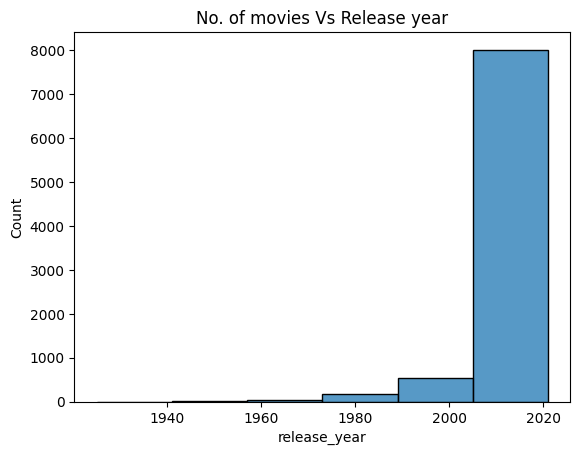

In [54]:
sns.histplot(df_clean["release_year"], bins=6)
plt.title("No. of movies Vs Release year")
plt.show()

In [23]:
df_clean.groupby(["type"]).nunique()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,6126,6126,4353,5444,651,1531,73,14,205,278,6100
TV Show,2664,2664,223,2272,196,1051,46,9,15,235,2660


In [24]:
df['country'].value_counts()[:10]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [25]:
country = df_clean[df_clean.country!="unknown"].set_index("title").country.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
country


title
Dick Johnson Is Dead     United States
Blood & Water             South Africa
Ganglands                United States
Jailbirds New Orleans    United States
Kota Factory                     India
                             ...      
Zodiac                   United States
Zombie Dumb              United States
Zombieland               United States
Zoom                     United States
Zubaan                           India
Length: 10833, dtype: object

In [26]:
last_30_years=df_clean[df_clean["release_year"]>1991]
movies=last_30_years.loc[last_30_years["type"]=="Movie"]
tv_show=last_30_years.loc[last_30_years["type"]=="TV Show"]
group=movies.groupby("release_year").count()

In [27]:
movies=last_30_years.loc[last_30_years["type"]=="Movie"]
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
tv_show=last_30_years.loc[last_30_years["type"]=="TV Show"]
tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [29]:
group=movies.groupby("release_year").count()
group

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
1992,20,20,20,20,20,20,20,20,20,20,20
1993,24,24,24,24,24,24,24,24,24,24,24
1994,20,20,20,20,20,20,20,20,20,20,20
1995,23,23,23,23,23,23,23,23,23,23,23
1996,21,21,21,21,21,21,21,21,21,21,21
1997,34,34,34,34,34,34,34,34,34,34,34
1998,32,32,32,32,32,32,32,32,32,32,32
1999,32,32,32,32,32,32,32,32,32,32,32
2000,33,33,33,33,33,33,33,33,33,33,33


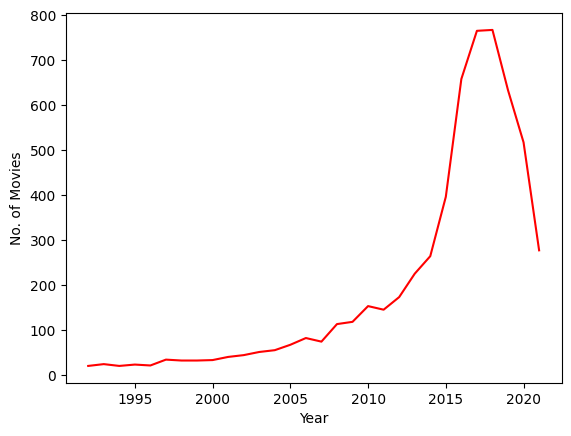

In [31]:
ax=sns.lineplot(data=group,
 x="release_year",
 y="show_id",
 color="red")
ax.set(xlabel="Year", ylabel="No. of Movies")

plt.show()

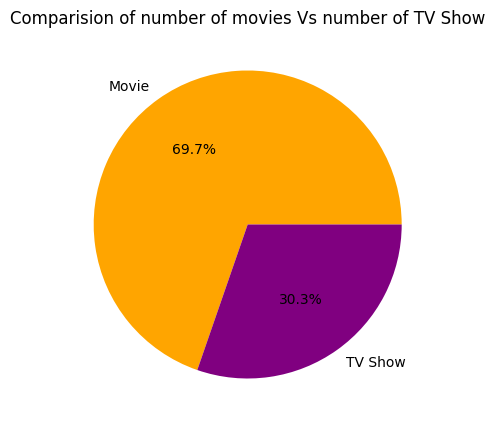

In [33]:
plt.figure(figsize=(10,5))
compare_PieChart = plt.pie(df_clean.type.value_counts(), labels=df.type.value_counts().index,colors=["orange","purple"],autopct="%1.1f%%")
plt.title("Comparision of number of movies Vs number of TV Show")
plt.show()

In [34]:
compare_M_TV=df_clean.groupby("type").count().reset_index
compare_M_TV


<bound method DataFrame.reset_index of          show_id  title  director  cast  country  date_added  release_year  \
type                                                                         
Movie       6126   6126      6126  6126     6126        6126          6126   
TV Show     2664   2664      2664  2664     2664        2664          2664   

         rating  duration  listed_in  description  
type                                               
Movie      6126      6126       6126         6126  
TV Show    2664      2664       2664         2664  >

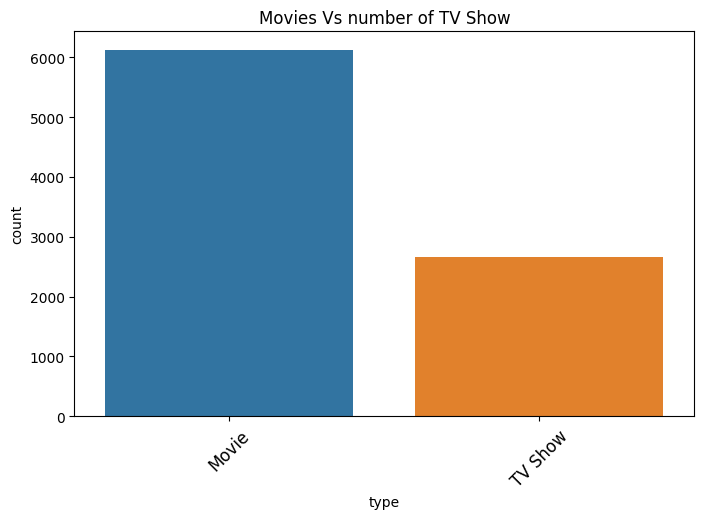

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x="type")
plt.xticks(rotation=45,fontsize=12)
plt.title("Movies Vs number of TV Show")
plt.show()


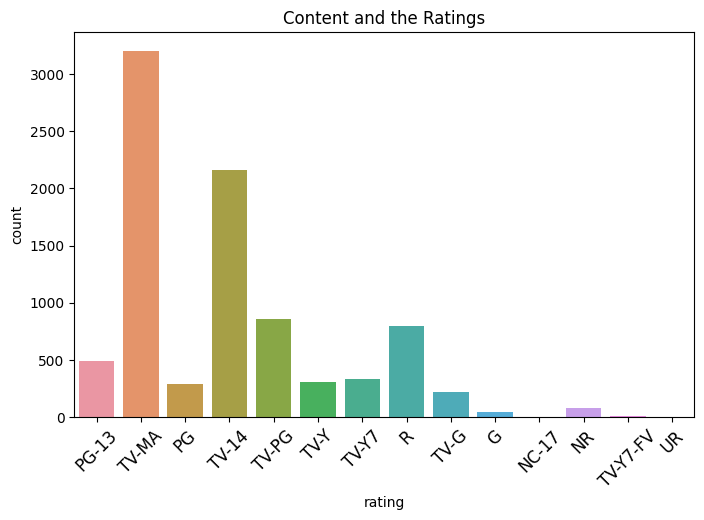

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x="rating")
plt.xticks(rotation=45,fontsize=12)
plt.title("Content and the Ratings")
plt.show()

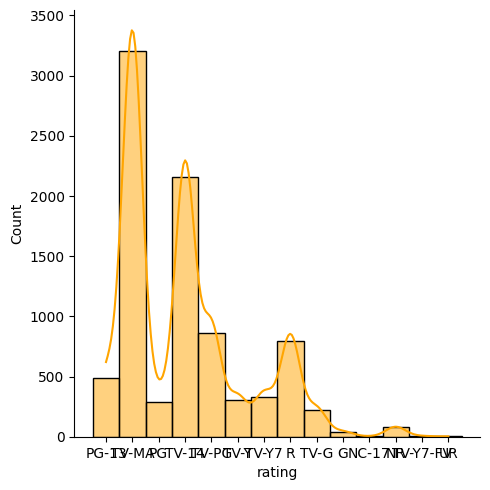

In [38]:
sns.displot(df_clean["rating"],bins=10, kde=True, color = "orange")
plt.show()

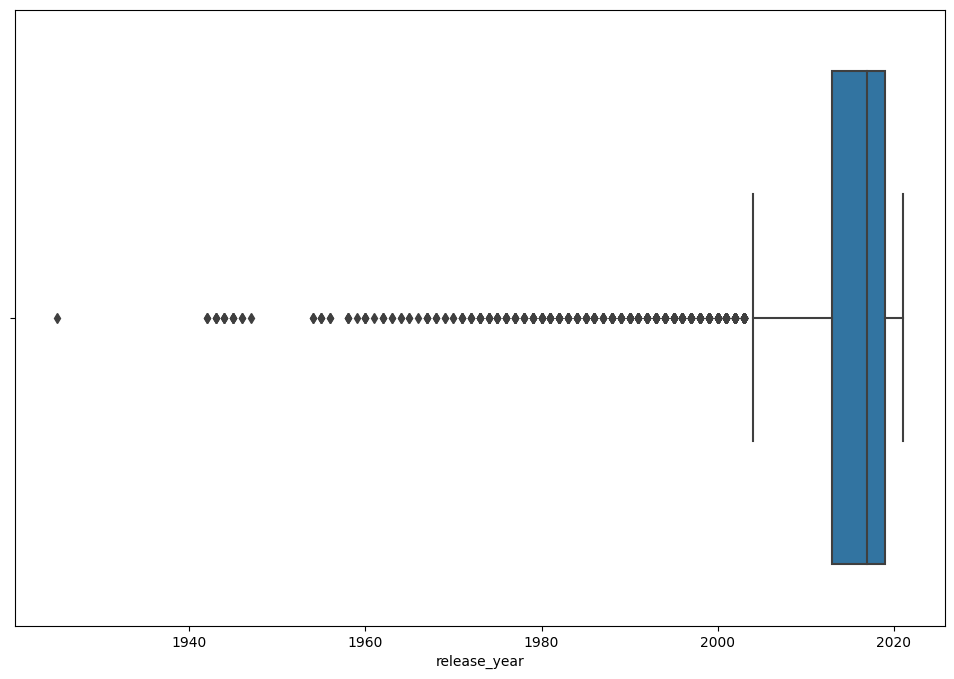

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_clean["release_year"])
plt.show()


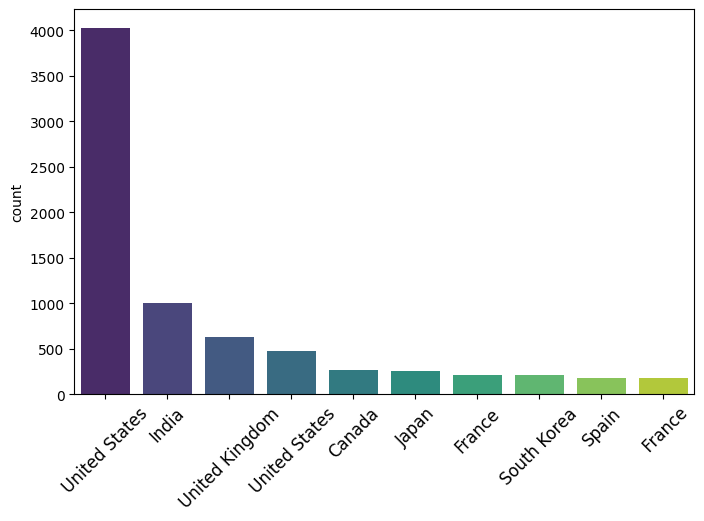

In [40]:
country_df = df_clean[df_clean.country!="unknown"].set_index("title").country.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(8,5))
sns.countplot(x=country_df, order=country_df.value_counts().index[:10],palette="viridis")
plt.xticks(rotation=45,fontsize=12)
plt.show()

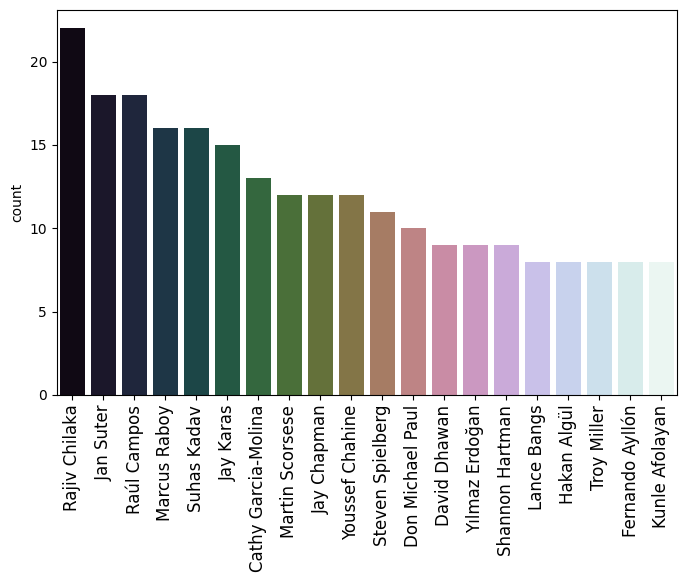

In [41]:
director_df = df_clean[df_clean.director!="unknown"].set_index("title").director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(8,5))
sns.countplot(x=director_df, order=director_df.value_counts().index[:20],palette="cubehelix")
plt.xticks(rotation=90,fontsize=12)
plt.show()

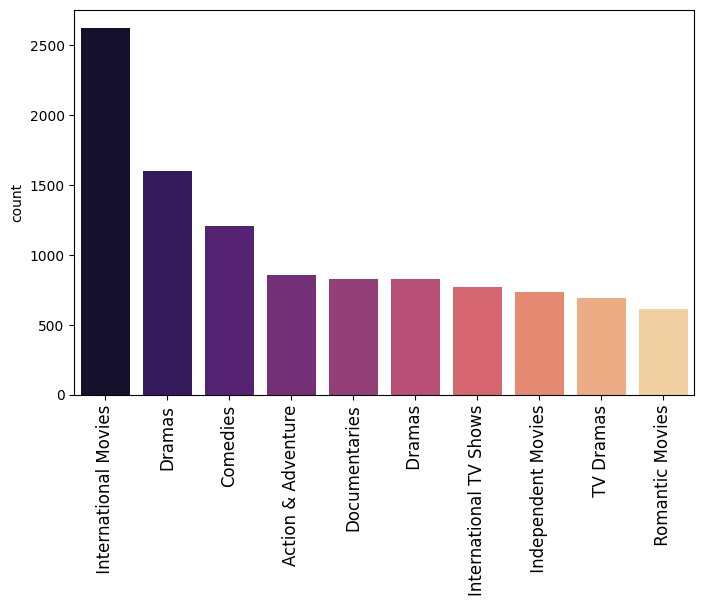

In [42]:
genre_df = df_clean[df_clean.listed_in!="unknown"].set_index("title").listed_in.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(8,5))
sns.countplot(x=genre_df, order=genre_df.value_counts().index[:10],palette="magma")
plt.xticks(rotation=90,fontsize=12)
plt.show()

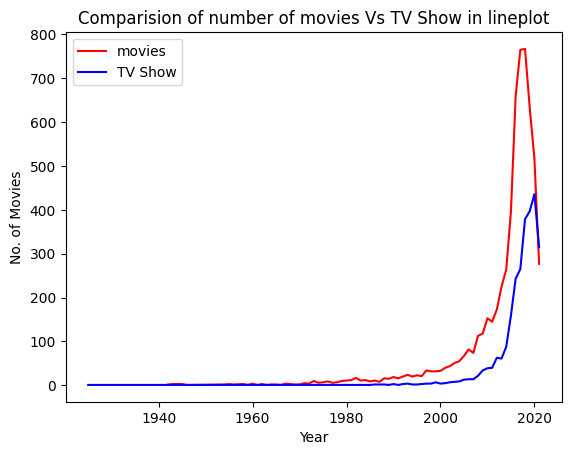

In [43]:
group_df=df_clean.groupby(["release_year","type"]).count()
group_df=group_df.reset_index()
df_movie=group_df.loc[group_df["type"]=="Movie"]
df_tv=group_df.loc[group_df["type"]=="TV Show"]

ax=sns.lineplot(data=df_movie,
 x="release_year",
 y="title",
 color="red",label="movies")


ax=sns.lineplot(data=df_tv,
 x="release_year",
 y="title",
 color="blue",label="TV Show")

ax.set(xlabel="Year", ylabel="No. of Movies")
plt.title("Comparision of number of movies Vs TV Show in lineplot")
plt.show()

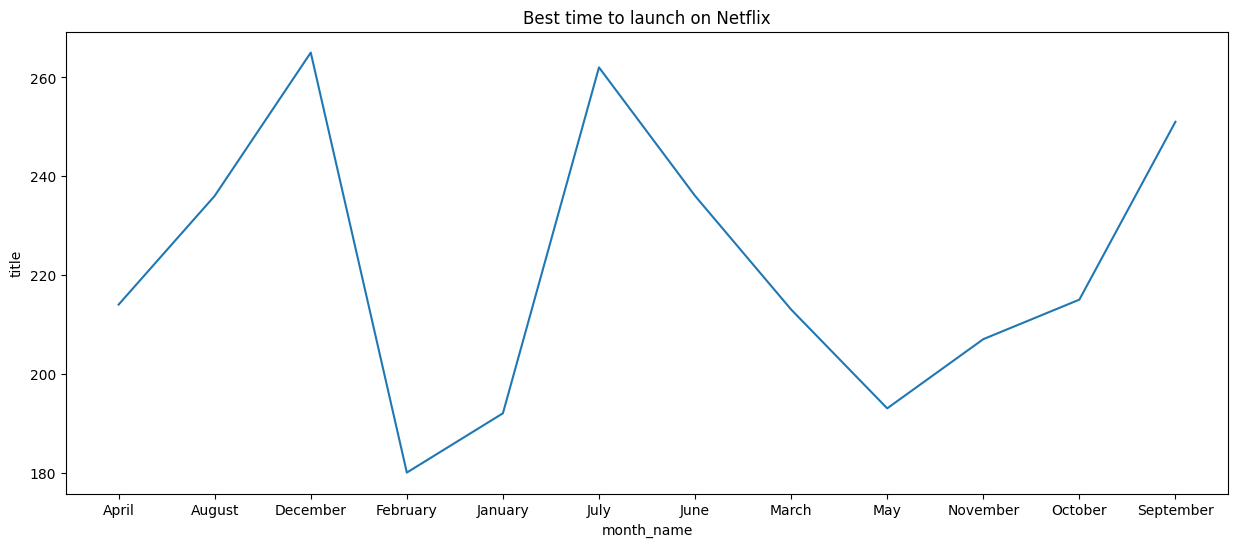

In [46]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'])
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added']=df_clean['date_added'].dt.month
df_clean['month_name'] = df_clean['date_added'].dt.month_name()
df_clean['month_name_added']=df_clean['date_added'].dt.month_name()
df_tvshow = df_clean.loc[df_clean["type"]=="TV Show"]
df_month = df_tvshow.groupby(["month_name"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(x = "month_name",y = "title", data = df_month)
plt.title("Best time to launch on Netflix")
plt.show()

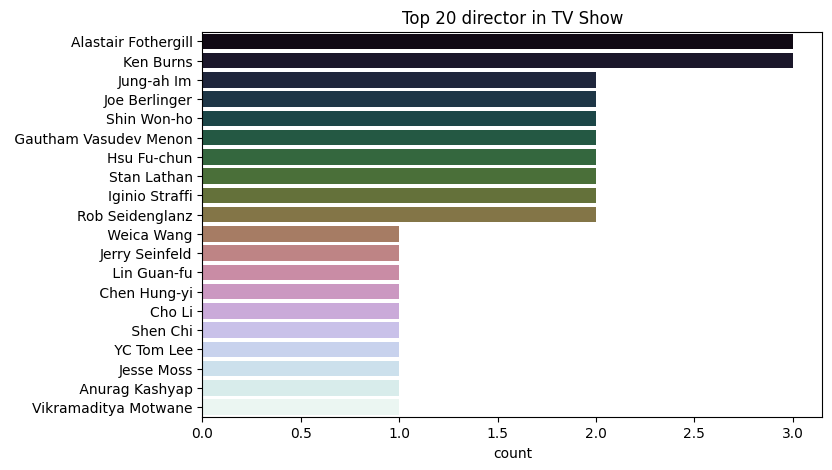

In [51]:
df_tvshow = df_clean.loc[df_clean["type"]=="TV Show"]
director_tv = df_tvshow[df_tvshow.director!="unknown"].set_index("title").director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(8,5))
sns.countplot(y=director_tv, order=director_tv.value_counts().index[:20],palette="cubehelix")
plt.title("Top 20 director in TV Show")
plt.show()

In [49]:
df_tvshow = df_clean.loc[df_clean["type"]=="TV Show"]
df_mov=df_clean.loc[df_clean["type"]=="Movie"]
director_movies = df_mov[df_mov.director!="unknown"].set_index("title").director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
director_movies = df_mov[df_mov.director!="unknown"].set_index("title").director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

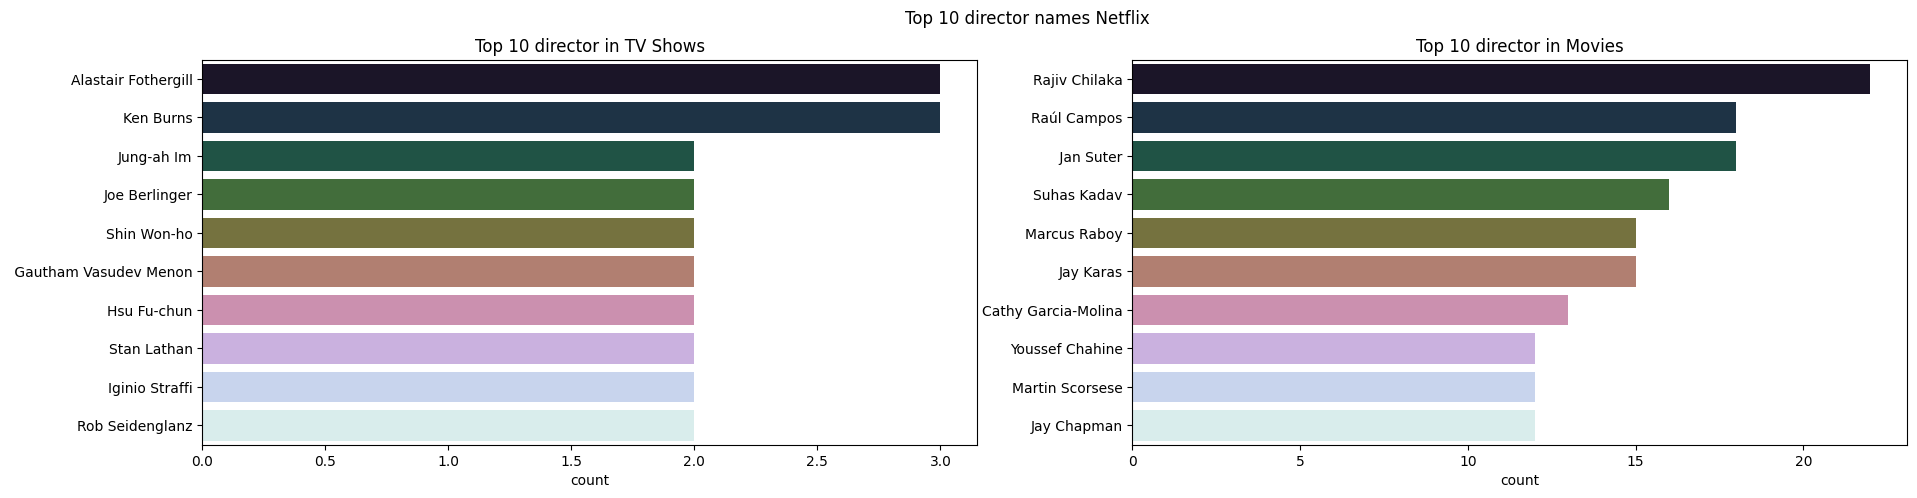

In [50]:
fig=plt.figure(figsize=(22,5))

plt.subplot(1,2,1)
sns.countplot(y=director_tv, order=director_tv.value_counts().index[:10],palette="cubehelix")
plt.yticks(fontsize=10)
plt.title("Top 10 director in TV Shows")


plt.subplot(1,2,2)
sns.countplot(y=director_movies, order=director_movies.value_counts().index[:10],palette="cubehelix")
plt.yticks(fontsize=10)
plt.title("Top 10 director in Movies")

fig.suptitle("Top 10 director names Netflix")

plt.show()


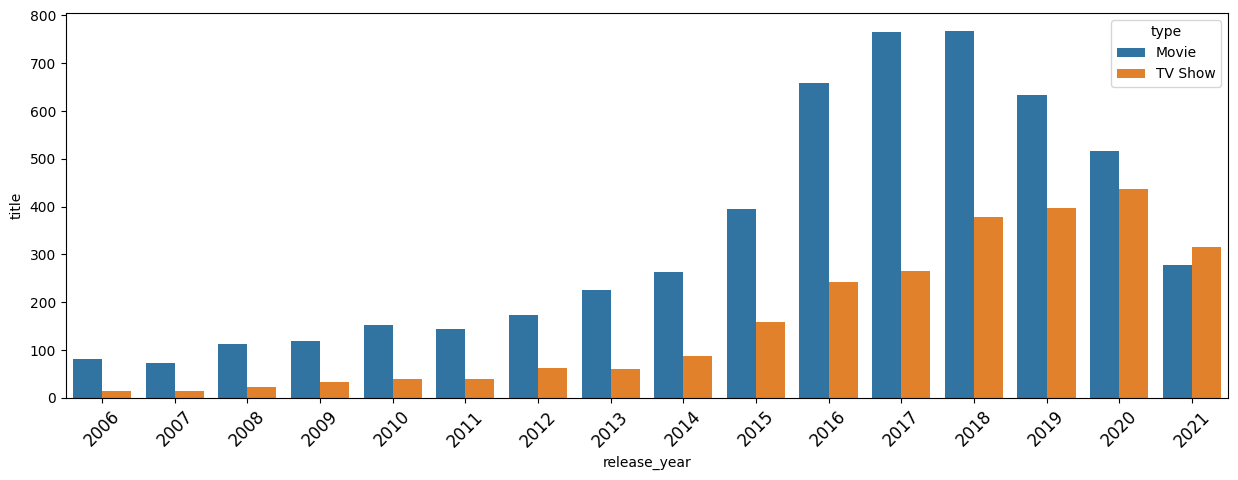

In [52]:
df1 = df_clean.groupby(["release_year","type"]).count().reset_index()
fig=plt.figure(figsize=(15,5))
sns.barplot(data=df1.loc[df1["release_year"]>2005], x="release_year",y="title",hue="type")
plt.xticks(rotation=45,fontsize=12)
plt.show()

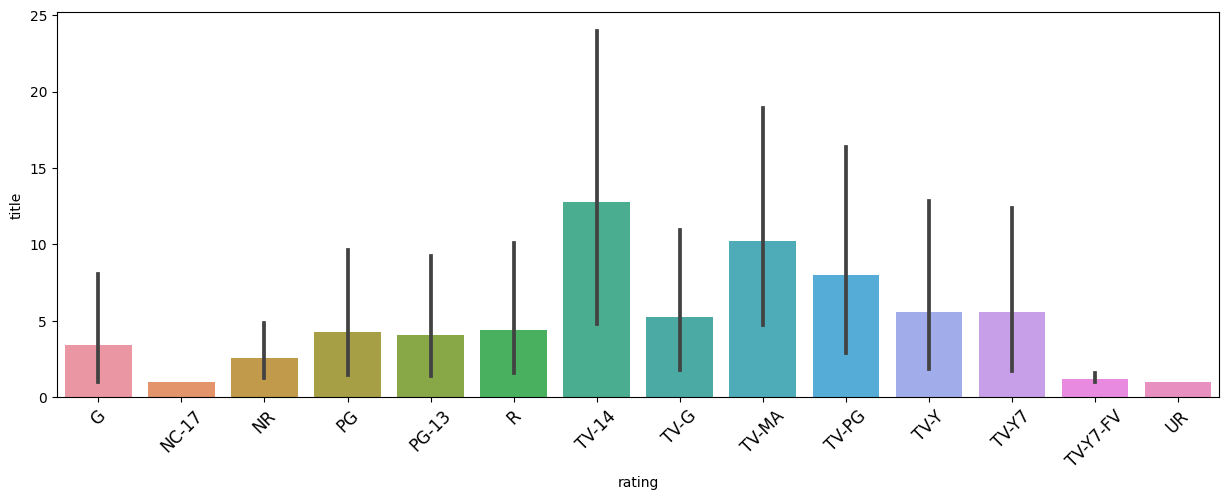

In [53]:
df2 = df_clean.groupby(["rating","country"]).count().reset_index()
fig=plt.figure(figsize=(15,5))
sns.barplot(data=df2, x="rating",y="title")
plt.xticks(rotation=45,fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

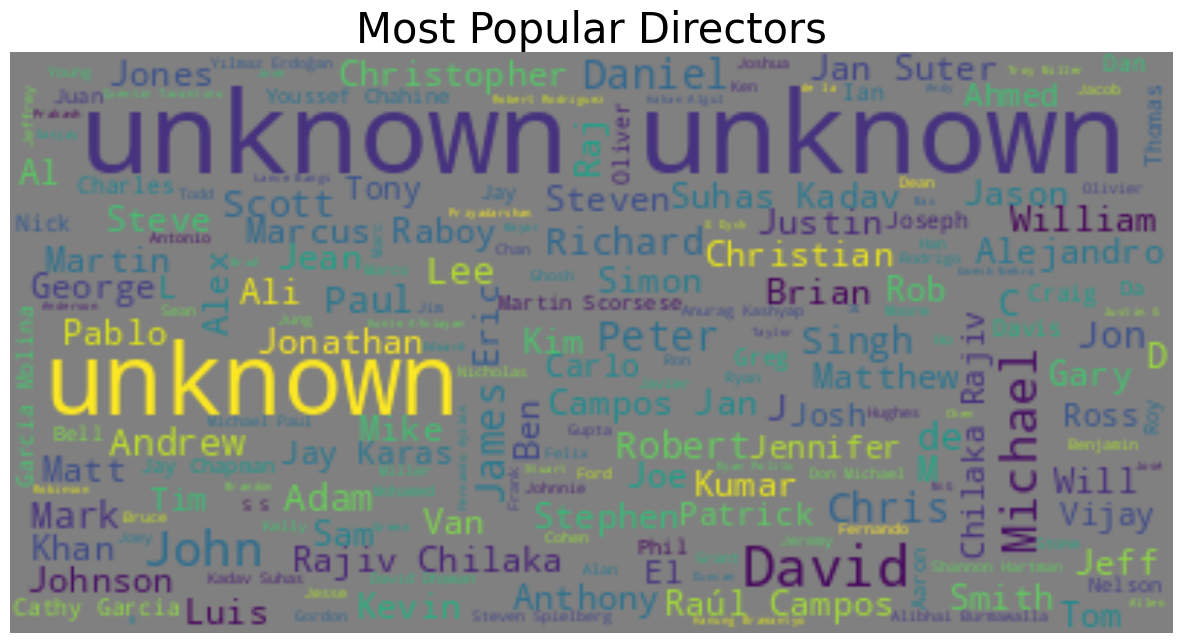

In [59]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_clean.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 30)
plt.axis("off")
plt.show()